# TRABALHO PRÁTICO 2
#### Ana Paula Serafim de Góis / Software / 7° / C210-L6
#### Letícia Vitória Merss Moreira / Software / 7° / C210-L6

## Sistema SISO

In [2]:
#!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzzy
import skfuzzy.control as control

## Criando os Precedentes (Entrada de dados)

c:\users\letic\appdata\local\programs\python\python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


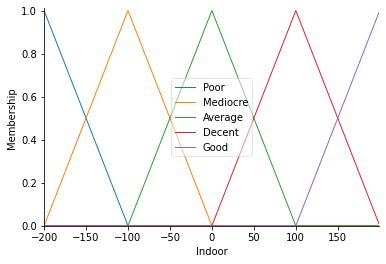

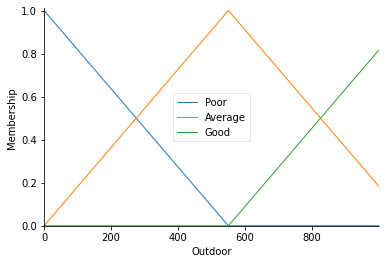

In [3]:
# Definindo universo de discurso e nome da variável
universo_indoor = np.arange(-200, 200)
universo_outdoor = np.arange(0, 1000)

Indoor_light = control.Antecedent(universe = universo_indoor, label = "Indoor")
Outdoor_light = control.Antecedent(universe = universo_outdoor, label = "Outdoor")

# Criando função de pertinência triangular -> trimf, trapezoidal -> trapmf
Indoor_light["Poor"] = fuzzy.trimf(Indoor_light.universe, [-200, -200, -100])
Indoor_light["Mediocre"] = fuzzy.trimf(Indoor_light.universe, [-200, -100, 0])
Indoor_light["Average"] = fuzzy.trimf(Indoor_light.universe, [-100, 0, 100])
Indoor_light["Decent"] = fuzzy.trimf(Indoor_light.universe, [0, 100, 200])
Indoor_light["Good"] = fuzzy.trimf(Indoor_light.universe, [100, 200, 200])

Outdoor_light["Poor"] = fuzzy.trimf(Outdoor_light.universe, [0, 0, 550])
Outdoor_light["Average"] = fuzzy.trimf(Outdoor_light.universe, [0, 550, 1100])
Outdoor_light["Good"] = fuzzy.trimf(Outdoor_light.universe, [550, 1100, 1100])


Indoor_light.view()
Outdoor_light.view()

## Criando consequentes (Saída de dados)

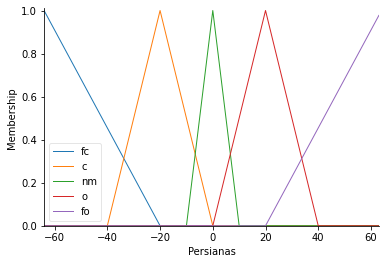

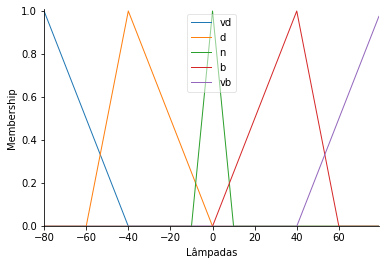

In [4]:
# Universo das Persianas e das Lâmpadas
universo_persianas = np.arange(-64, 64)
universo_lampadas = np.arange(-80, 80)

persiana = control.Consequent(universe = universo_persianas, label = "Persianas")
lampadas = control.Consequent(universe = universo_lampadas, label = "Lâmpadas")

persiana["fc"] = fuzzy.trimf(persiana.universe, [-64, -64, -20])
persiana["c"] = fuzzy.trimf(persiana.universe, [-40, -20, 0])
persiana["nm"] = fuzzy.trimf(persiana.universe, [-10, 0, 10])
persiana["o"] = fuzzy.trimf(persiana.universe, [0, 20, 40])
persiana["fo"] = fuzzy.trimf(persiana.universe, [20, 64, 64])

lampadas["vd"] = fuzzy.trimf(lampadas.universe, [-80, -80, -40])
lampadas["d"] = fuzzy.trimf(lampadas.universe, [-60, -40, 0])
lampadas["n"] = fuzzy.trimf(lampadas.universe, [-10, 0, 10])
lampadas["b"] = fuzzy.trimf(lampadas.universe, [0, 40, 60])
lampadas["vb"] = fuzzy.trimf(lampadas.universe, [40, 80, 80])

persiana.view()
lampadas.view()

## Conjunto de Regras

In [5]:
#Regras Persianas
regra1 = control.Rule(Indoor_light["Poor"] & Outdoor_light["Poor"], persiana["fo"])
regra2 = control.Rule(Indoor_light["Poor"] & Outdoor_light["Average"], persiana["fo"])
regra3 = control.Rule(Indoor_light["Poor"] & Outdoor_light["Good"], persiana["o"])
regra4 = control.Rule(Indoor_light["Mediocre"] & Outdoor_light["Poor"], persiana["fo"])
regra5 = control.Rule(Indoor_light["Mediocre"] & Outdoor_light["Average"], persiana["o"])
regra6 = control.Rule(Indoor_light["Mediocre"] &Outdoor_light["Good"], persiana["o"])
regra7 = control.Rule(Indoor_light["Average"], persiana["nm"])
regra8 = control.Rule(Indoor_light["Decent"] & Outdoor_light["Poor"], persiana["nm"])
regra9 = control.Rule(Indoor_light["Decent"] & Outdoor_light["Average"], persiana["c"])
regra10 = control.Rule(Indoor_light["Decent"] & Outdoor_light["Good"], persiana["fc"])
regra11 = control.Rule(Indoor_light["Good"] & Outdoor_light["Poor"], persiana["c"])
regra12 = control.Rule(Indoor_light["Good"] & Outdoor_light["Average"], persiana["fc"])
regra13 = control.Rule(Indoor_light["Good"] & Outdoor_light["Good"], persiana["fc"])

#Regras Lâmpadas
regra14 = control.Rule(Indoor_light["Poor"] & Outdoor_light["Poor"], lampadas["vb"])
regra15 = control.Rule(Indoor_light["Poor"] & Outdoor_light["Average"], lampadas["vb"])
regra16 = control.Rule(Indoor_light["Poor"] & Outdoor_light["Good"], lampadas["b"])
regra17 = control.Rule(Indoor_light["Mediocre"] & Outdoor_light["Poor"], lampadas["vb"])
regra18 = control.Rule(Indoor_light["Mediocre"] & Outdoor_light["Average"], lampadas["b"])
regra19 = control.Rule(Indoor_light["Mediocre"] & Outdoor_light["Good"], lampadas["b"])
regra20 = control.Rule(Indoor_light["Average"], lampadas["n"])
regra21 = control.Rule(Indoor_light["Decent"] & Outdoor_light["Poor"], lampadas["n"])
regra22 = control.Rule(Indoor_light["Decent"] & Outdoor_light["Average"], lampadas["d"])
regra23 = control.Rule(Indoor_light["Decent"] & Outdoor_light["Good"], lampadas["vd"])
regra24 = control.Rule(Indoor_light["Good"] & Outdoor_light["Poor"], lampadas["d"])
regra25 = control.Rule(Indoor_light["Good"] & Outdoor_light["Average"], lampadas["vd"])
regra26 = control.Rule(Indoor_light["Good"] & Outdoor_light["Good"], lampadas["vd"])

# Adicionando regras ao controle
controle_regras = control.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9, regra10, regra11, regra12, regra13,regra14, regra15, regra16, regra17, regra18, regra19, regra20, regra21, regra22, regra23, regra24, regra25, regra26])

## Criando o sistema

Teste 1
Resultado 'desfuzzificado': 33.87474187588306
Resultado 'desfuzzificado': 44.00866122246968


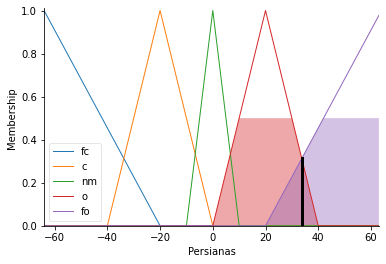

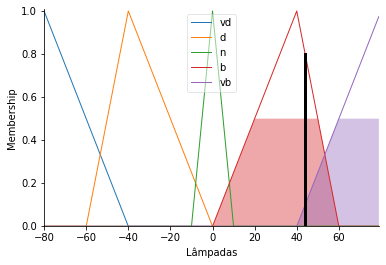

In [6]:
# Criando sistema com o controle de regras
sistema = control.ControlSystemSimulation(controle_regras)

sistema.input["Indoor"] = -150
sistema.input["Outdoor"] = 525

# Executando o sistema
sistema.compute()

print("Teste 1")
print(f"Resultado 'desfuzzificado': {sistema.output['Persianas']}")
print(f"Resultado 'desfuzzificado': {sistema.output['Lâmpadas']}")

persiana.view(sim = sistema)
lampadas.view(sim = sistema)

Teste 2
Resultado 'desfuzzificado': -26.847434028909802
Resultado 'desfuzzificado': -37.677544252964175


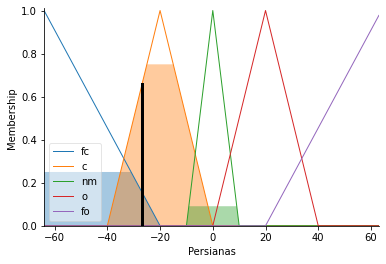

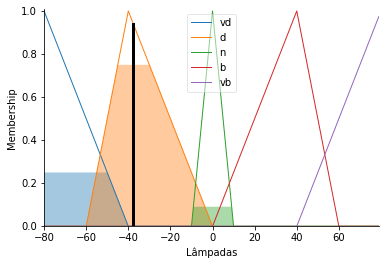

In [7]:
sistema.input["Indoor"] = 125
sistema.input["Outdoor"] = 500

# Executando o sistema
sistema.compute()

print("Teste 2")
print(f"Resultado 'desfuzzificado': {sistema.output['Persianas']}")
print(f"Resultado 'desfuzzificado': {sistema.output['Lâmpadas']}")

persiana.view(sim = sistema)
lampadas.view(sim = sistema)